# Image Classification Data (Fashion-MNIST)

Fashion-MNIST
1) Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.

2) Each example is a 28x28 grayscale image, associated with a label from 10 classes.

3) Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms.

4) It shares the same image size and structure of training and testing splits.

## 1) Exploring the Dataset

### 1.1) Importing Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 
import itertools

# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Modelling Helpers :
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  

# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

In [4]:
# Center all plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

# Make Visualizations better
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

### 1.2) Extracting Dataset

In [5]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')
df = train.copy()
df_test = test.copy()

In [6]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.3) Features

1. Label: The Target variable.
2. Pixels: The smallest unit of a Digital Image or Graphic that can be displayed on Digital Display Device.
Where humans can see the objects due to the Light Receptors in their Eyes which send Signals via the Optic Nerve to the Primary Visual Cortex, where the input is processed ,

Computers on the other hand, see the Image as 2-dimensional arrays of numbers, known as pixels. They Classify Images based on Boundaries and Curvatures of the Object (Represented by pixel values, either RGB or GrayScale) .

This is the Partial View of the Labels and the Dataset.

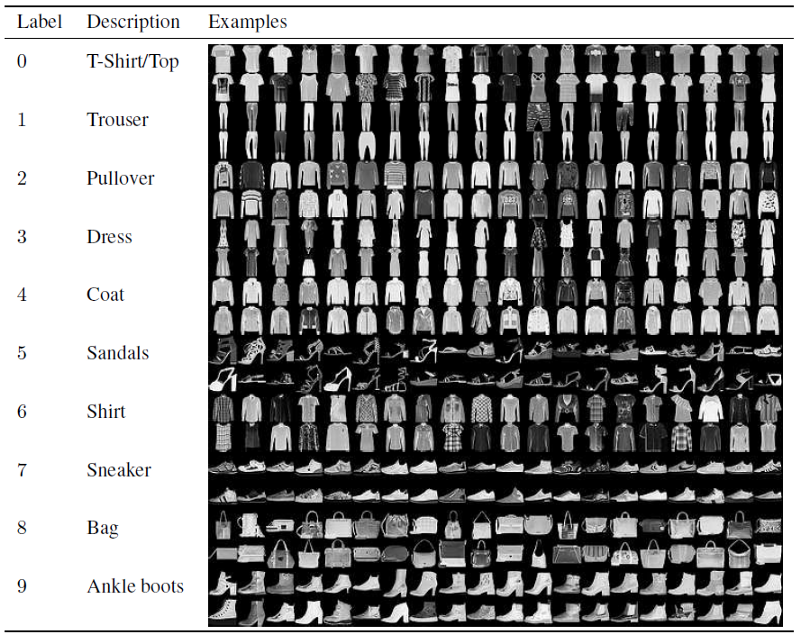

### 1.4) Examine Dimensions

So, there are 60,000 Training Samples and 10,000 Test Samples.

Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker.

This pixel-value is an integer between 0 and 255, inclusive.

The first column of the Training Samples consists of Class Labels and represents the article of Clothing.

In [7]:
print('Train: ', df.shape)
print('Test: ', df_test.shape)

Train:  (60000, 785)
Test:  (10000, 785)


In [8]:
df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

### 1.5) Examine NaN Values

In [9]:
#Train
df.isnull().any().sum()

0

In [10]:
#Test
df_test.isnull().any().sum()

0

 #### There are No Null Values in Train and Test Set.

## 2) Visualizing the Dataset

### 2.1) Plotting Random Images

In [11]:
# Mapping Classes
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

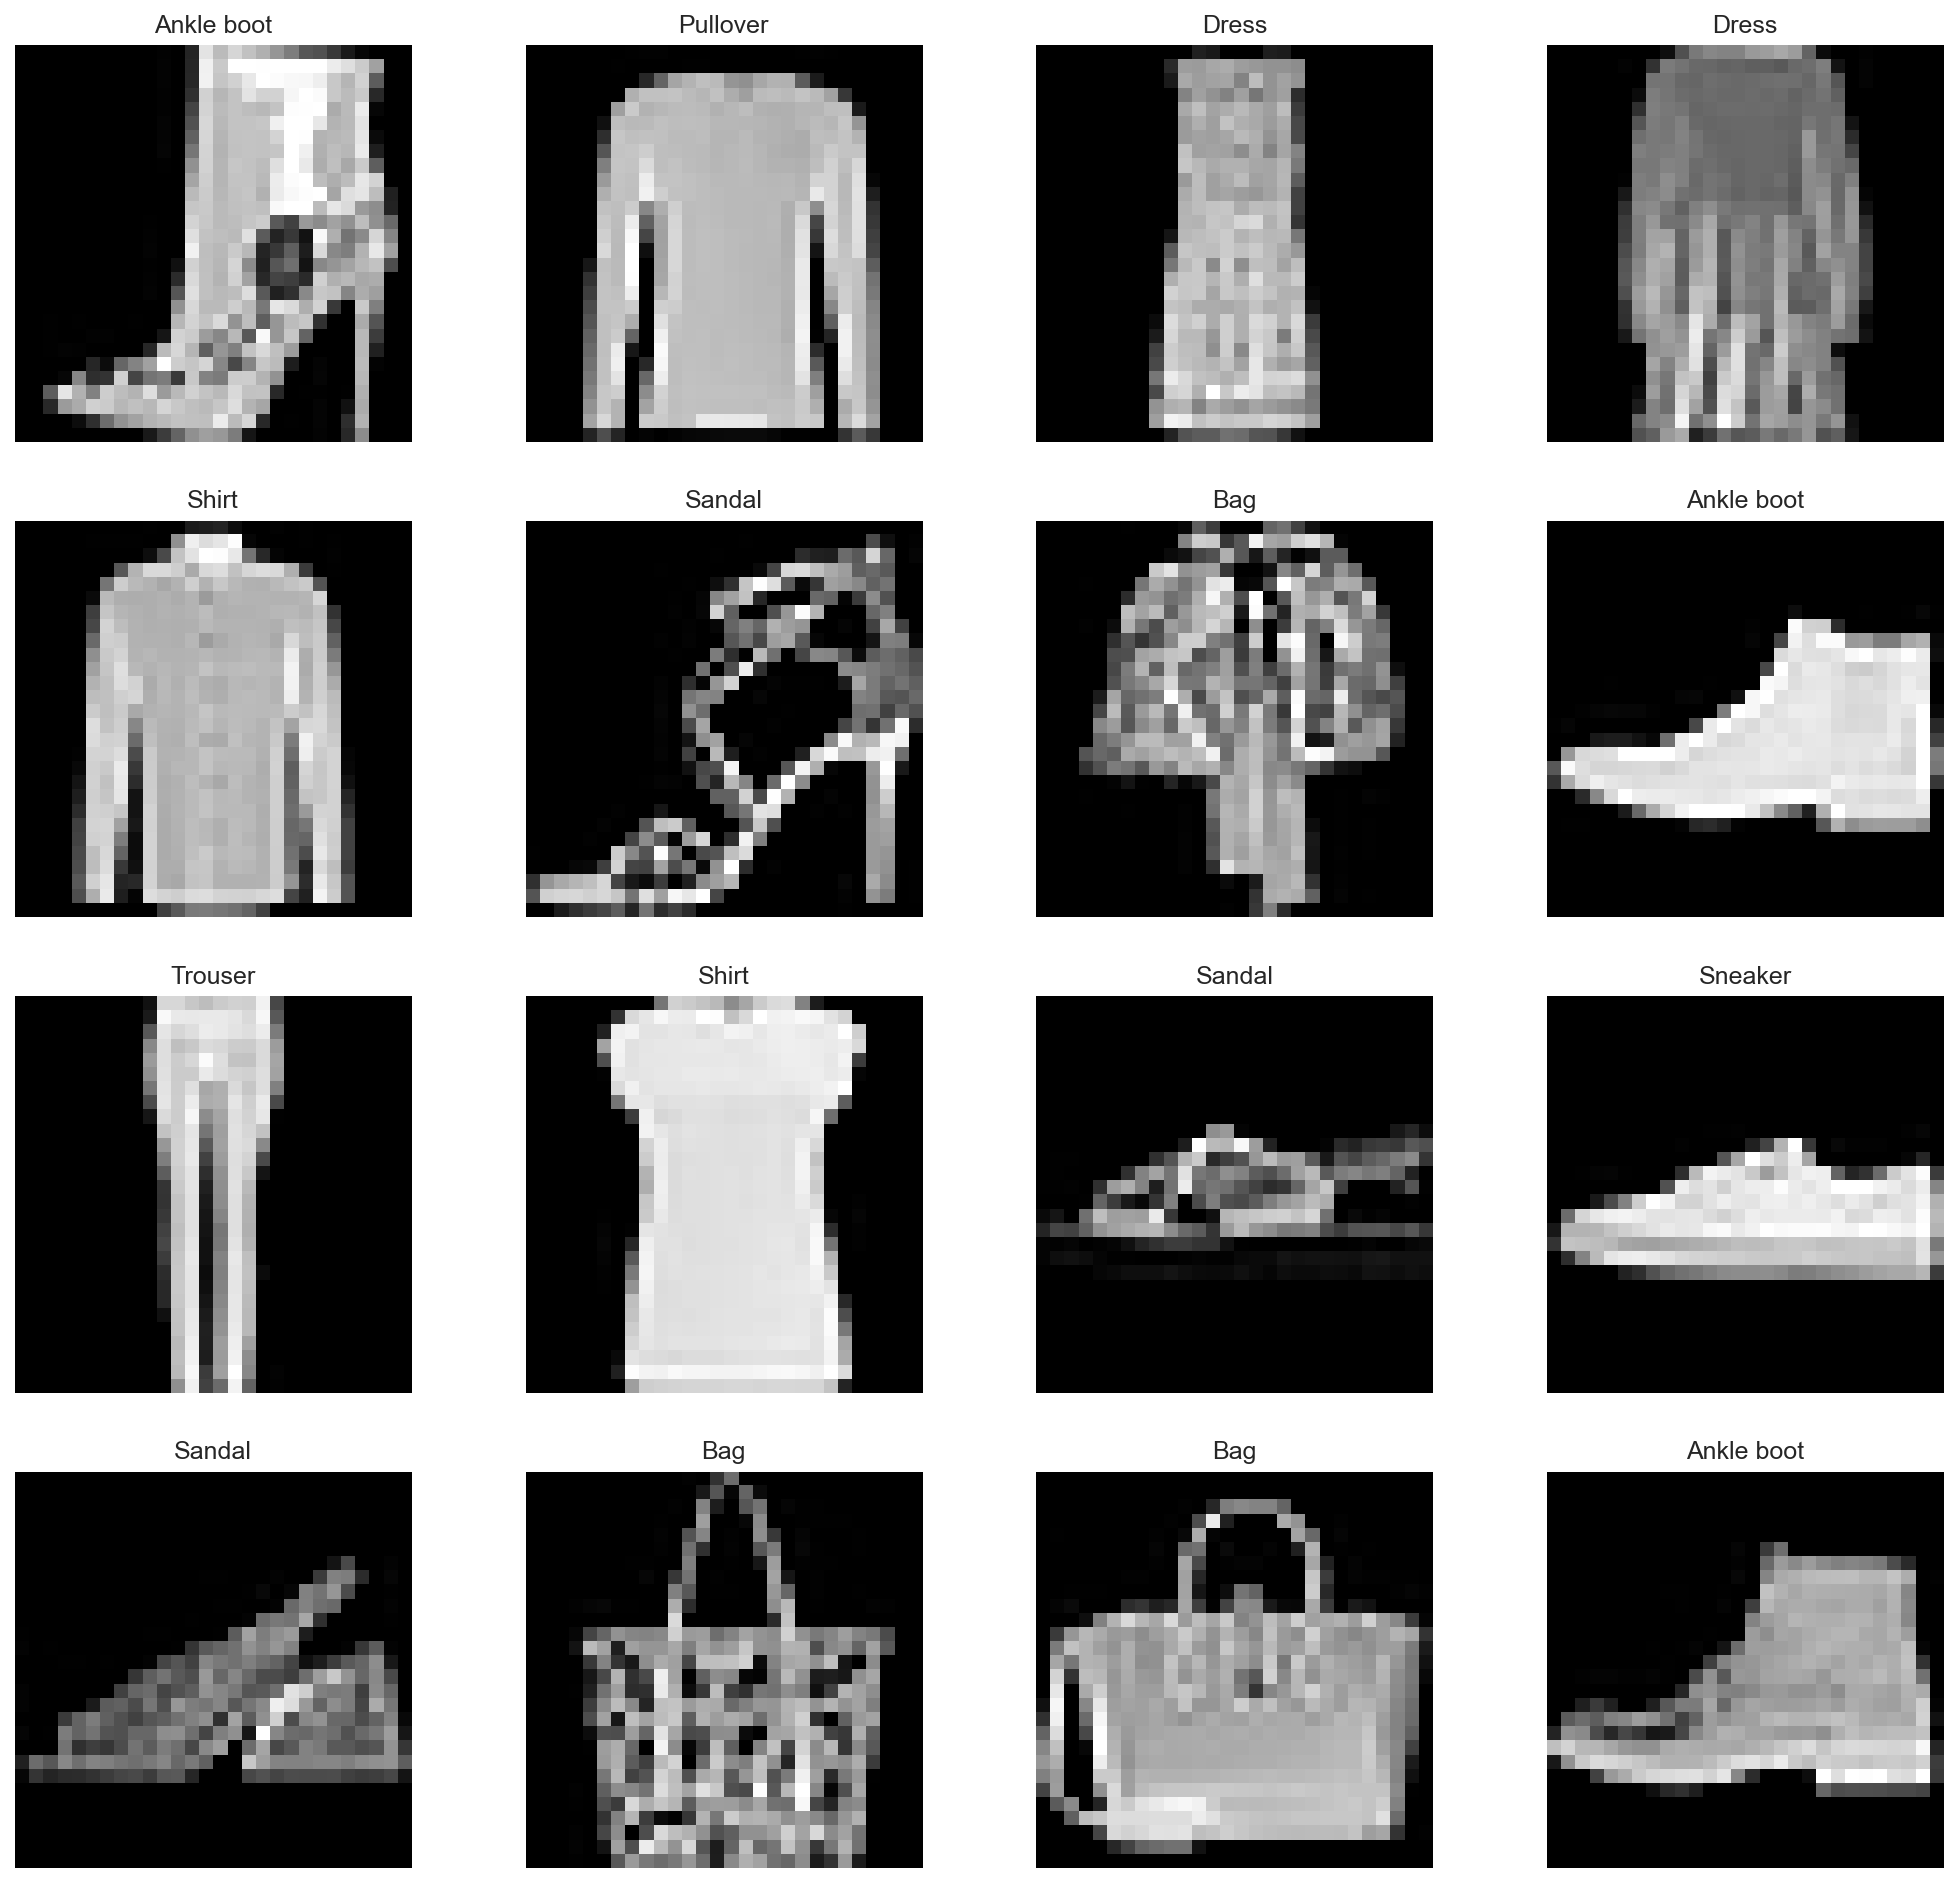

In [12]:
fig, axes = plt.subplots(4, 4, figsize = (15,15))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = df.drop('label', axis=1).values[index].reshape(28,28)
        cloths = df['label'][index]
        axe.imshow(img, cmap='gray')
        axe.set_title(clothing[cloths])
        axe.set_axis_off()

### 2.2) Distribution Of Labels

#### Let's look at the Distribution of labels to anaylze if there are any skewed classes.

In [13]:
df['label'].value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

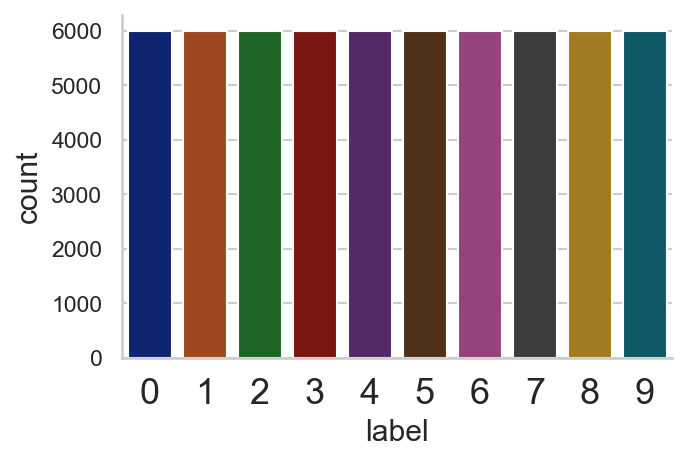

In [14]:
sns.factorplot(x='label', data=df, kind='count', size=3, aspect= 1.5)

#### We can see that all classes are equally Distributed.

#### So, there is no need for OverSampling or UnderSampling.

## 3) Data PreProcessing

### 3.1) Setting Random Seeds

In [15]:
seed = 66
np.random.seed(seed)

### 3.2) Splitting Data into Train and Validation Set

Now we are gonna split the training data into Train and Validation Set. Train set is used for Training the model and Validation set is used for Evaluating our Model's Performance on the Dataset.

This is achieved using the train_test_split method of scikit learn library.

In [16]:
X = train.iloc[:,1:]
Y = train.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=seed)

### 3.3) Reshaping the Images

Note that we have Images as 1D vector each containing 784 pixels. Before we feed the data to the CNN we must reshape the data into (28x28x1) 3D matrices.

This is because Keras wants an Extra Dimension in the end, for channels. If this had been RGB images, there would have been 3 channels, but as MNIST is gray scale it only uses one.

In [17]:
x_train = x_train.values.reshape((-1, 28, 28, 1))
x_test = x_test.values.reshape((-1, 28, 28, 1))

df_test.drop('label', axis=1, inplace=True)
df_test = df_test.values.reshape((-1, 28, 28, 1))

### 3.4) Normalization

The Pixel Values are often stored as Integer Numbers in the range 0 to 255, the range that a single 8-bit byte can offer. They need to be scaled down to [0,1] in order for Optimization Algorithms to work much faster. Here, we acheive Zero Mean and Unit Variance.

Normalization is carried out as follows:

x = (x - min) / (max - min) ; Here min=0 and max=255

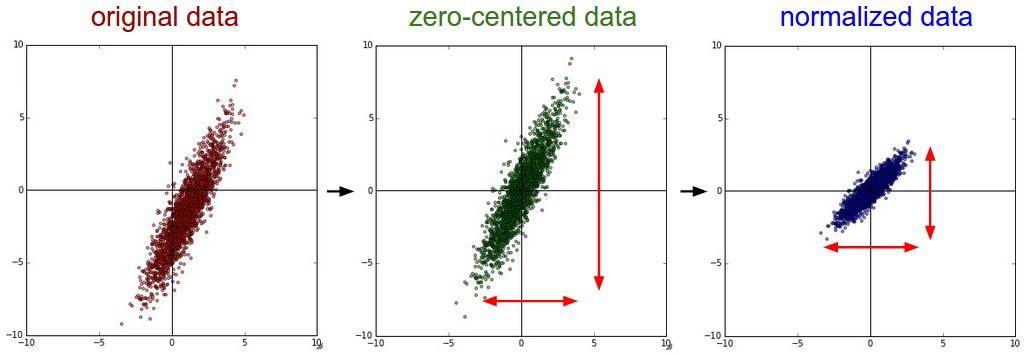

In [18]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
df_test = df_test.astype("float32")/255

### 3.5) One Hot Encoding

The labels are given as integers between 0-9. We need to one hot encode them , Eg 8 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0] .

We have 10 digits [0-9] or classes, therefore we one-hot-encode the target variable with 10 classes

In [19]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(y_train.shape)
print(y_test.shape)

(54000, 10)
(6000, 10)


## 4) Training a Convolutional Neural Network

### 4.1) Building a ConvNet

Steps:
1) At First, we use Sequential Keras API which is just a linear stack of layers. We add one layer at a time starting from input.

2) Next We add Convolutional Layers, which are the Building blocks of ConvNets. Convolutional Layers has set of Independent Filters whose depth is equal to Input and other dimensions can be set manually. These Filters when convolved over the Input Image produce Feature Maps.

It includes some HyperParameters such as The number of filters, Dimensions of Filter (F), Stride (S), Padding(P) , Activation Function etc. which we input manually. Let the Input Volume Size be deonted by (W) ,

Then, the Output will have Dimensions given by -->

(Height, Width) = ( ( W − F + 2P ) / S ) + 1

And the Depth will be equal to Number of Filters Specified.

3) Next We add Pooling Layers, which are used for Dimensionality Reduction or DownSampling the Input. These are used where we have lot of Input Features. It reduces the amount of Parameters and Computational power required drastically, thus reducing Overfitting. These along with Convolutional layers are able to learn more Complex features of the Image.

4) We add Batch Normalization where we acheive Zero mean and Variance one. It scales down outliers and forces the network to learn features in a distributed way, not relying too much on a Particular Weight and makes the model better Generalize the Images.

5) To avoid Overfitting We add Dropout. This randomly drops some percentage of neurons, and thus the weights gets Re-Aligned. The remaining Neurons learn more features and this reduces the dependency on any one Neuron. DropOut is a Regularization Technique, which Penalizes the Parameters. Generally we set the DropOutRate between 0.2-0.5 .

6) Finally we add Flatten layer to map the input to a 1D vector. We then add Fully connected Layers after some convolutional/pooling layers. It combines all the Features of the Previous Layers.

7) Lastly, we add the Output Layer. It has units equal to the number of classes to be identified. Here, we use 'sigmoid' function if it is Binary Classification otherwise 'softmax' activation function in case of Multi-Class Classification.

In [20]:
# Building a ConvNet
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
    
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

### 4.2) Compiling the Model

1) We need to compile the model. We have to specify the optimizer used by the model We have many choices like Adam, RMSprop etc.. Refer to Keras doc for a comprehensive list of the optimizers available.

2) Next we need to specify the loss function for the neural network which we want to minimize.

For Binary Classification we use "binary_crossentropy" and for Multi-class Classification we use "categorical_crossentropy".

3) Finally, We need to specify the metric to evaluate our models performance. Here I have used accuracy.

In [21]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

In [22]:
# Compiling the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

### 4.3) Model Summary

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        1

### 4.4) Learning Rate Decay

The Learning rate should be properly tuned , such that it is not too high to take very large steps, neither it should be too small , which would not alter the Weights and Biases.

We will use LearningRateScheduler here, which takes the step decay function as argument and return the updated learning rates for use in optimzer at every epoch stage. Basically it outputs a new learning rate at every epoch stage.

In [24]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

### 4.5) Data Augmentation

In [25]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images

In [26]:
datagen.fit(x_train)

### 4.6) Fitting the Model

In [27]:
batch_size = 128
epochs = 40

In [28]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Epoch 1/40
421/421 - 566s - loss: 0.8388 - accuracy: 0.6977 - val_loss: 1.0662 - val_accuracy: 0.5693 - lr: 0.0010 - 566s/epoch - 1s/step
Epoch 2/40
421/421 - 516s - loss: 0.5525 - accuracy: 0.7976 - val_loss: 0.3624 - val_accuracy: 0.8657 - lr: 9.0000e-04 - 516s/epoch - 1s/step
Epoch 3/40
421/421 - 511s - loss: 0.4713 - accuracy: 0.8297 - val_loss: 0.3478 - val_accuracy: 0.8758 - lr: 8.1000e-04 - 511s/epoch - 1s/step
Epoch 4/40
421/421 - 513s - loss: 0.4296 - accuracy: 0.8463 - val_loss: 0.2873 - val_accuracy: 0.8893 - lr: 7.2900e-04 - 513s/epoch - 1s/step
Epoch 5/40
421/421 - 522s - loss: 0.4012 - accuracy: 0.8561 - val_loss: 0.2911 - val_accuracy: 0.8895 - lr: 6.5610e-04 - 522s/epoch - 1s/step
Epoch 6/40
421/421 - 520s - loss: 0.3815 - accuracy: 0.8622 - val_loss: 0.2820 - val_accuracy: 0.8975 - lr: 5.9049e-04 - 520s/epoch - 1s/step
Epoch 7/40
421/421 - 519s - loss: 0.3644 - accuracy: 0.8702 - val_loss: 0.2736 - val_accuracy: 0.8945 - lr: 5.3144e-04 - 519s/epoch - 1s/step
Epoch 8/40

## 5) Evaluating the Model

In [29]:
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

188/188 [==============================] - 14s 76ms/step - loss: 0.1890 - accuracy: 0.9318
Loss: 0.1890
Accuracy: 0.9318


In [50]:
import torch
import torchvision.models as models

In [51]:
torch.save(model, 'model36.pth')

INFO:tensorflow:Assets written to: ram://cc620c3d-5d71-498e-ad20-48348df8d692/assets


INFO:tensorflow:Assets written to: ram://cc620c3d-5d71-498e-ad20-48348df8d692/assets


### 5.1) Plotting the Training and Validation Curves

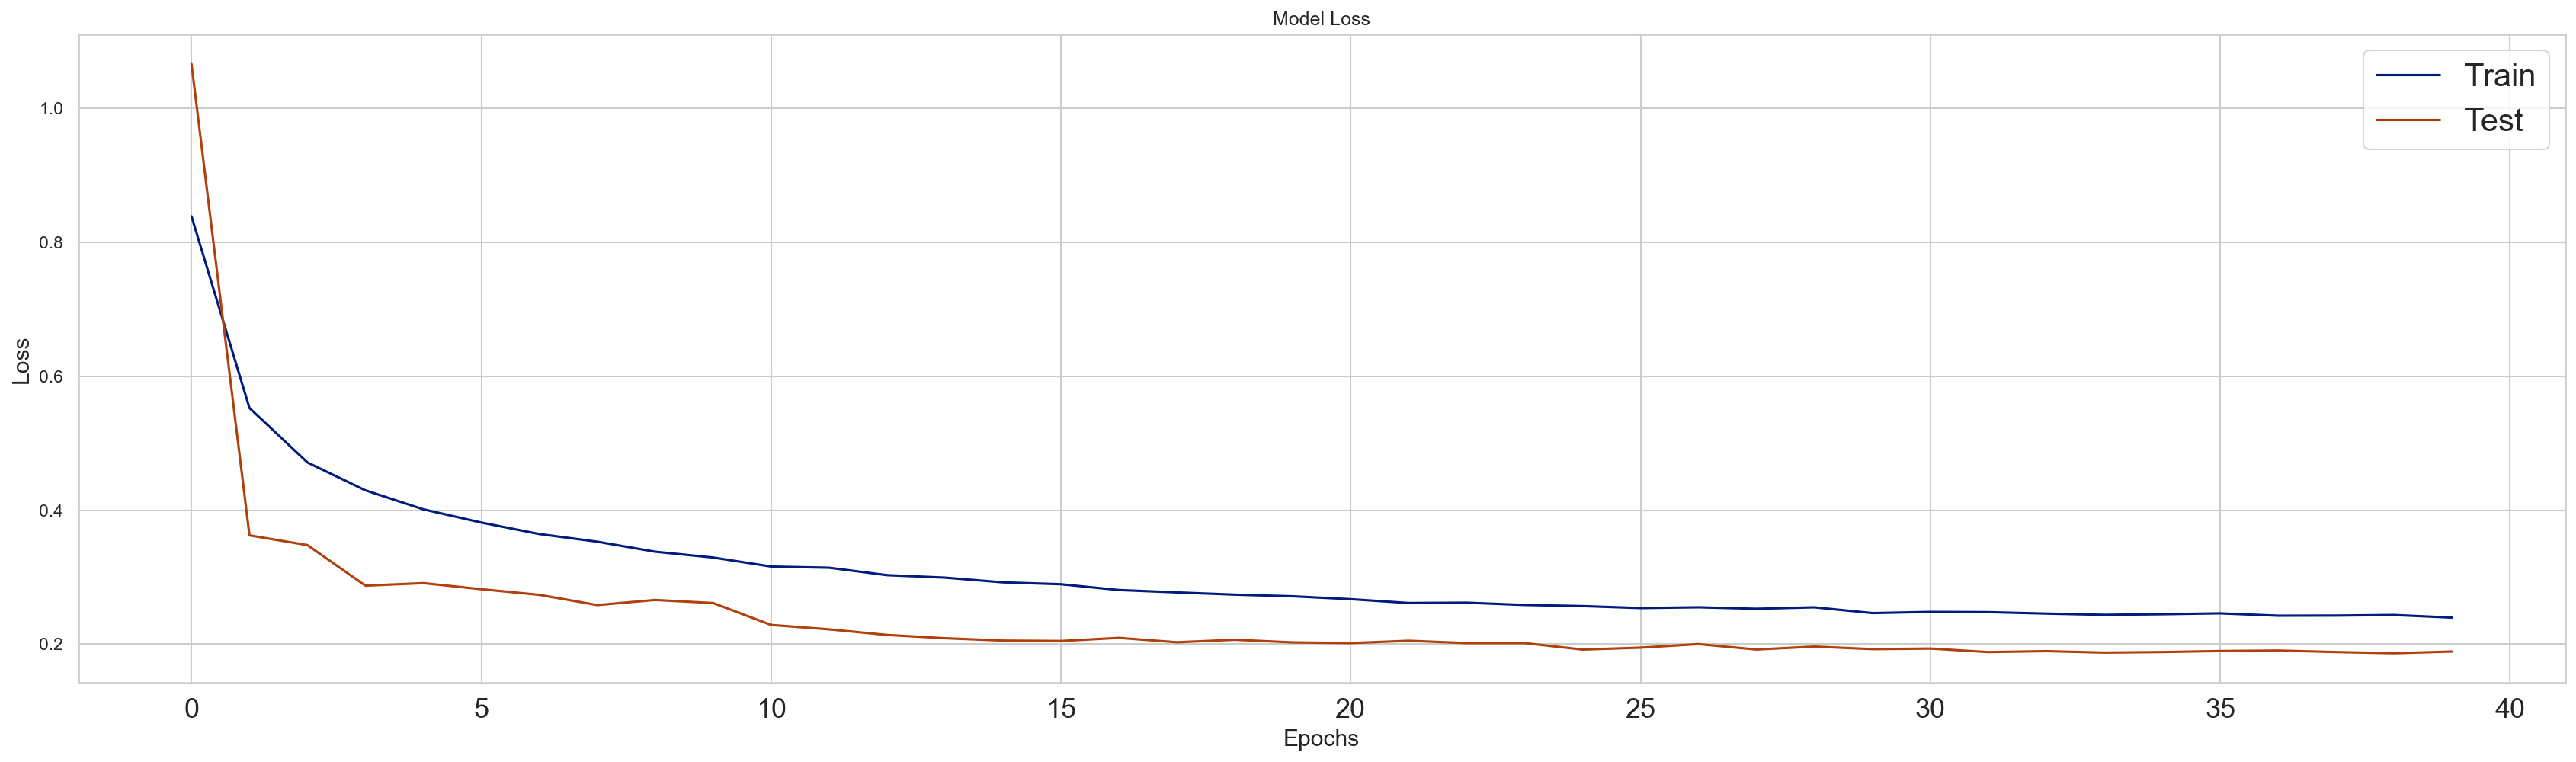

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

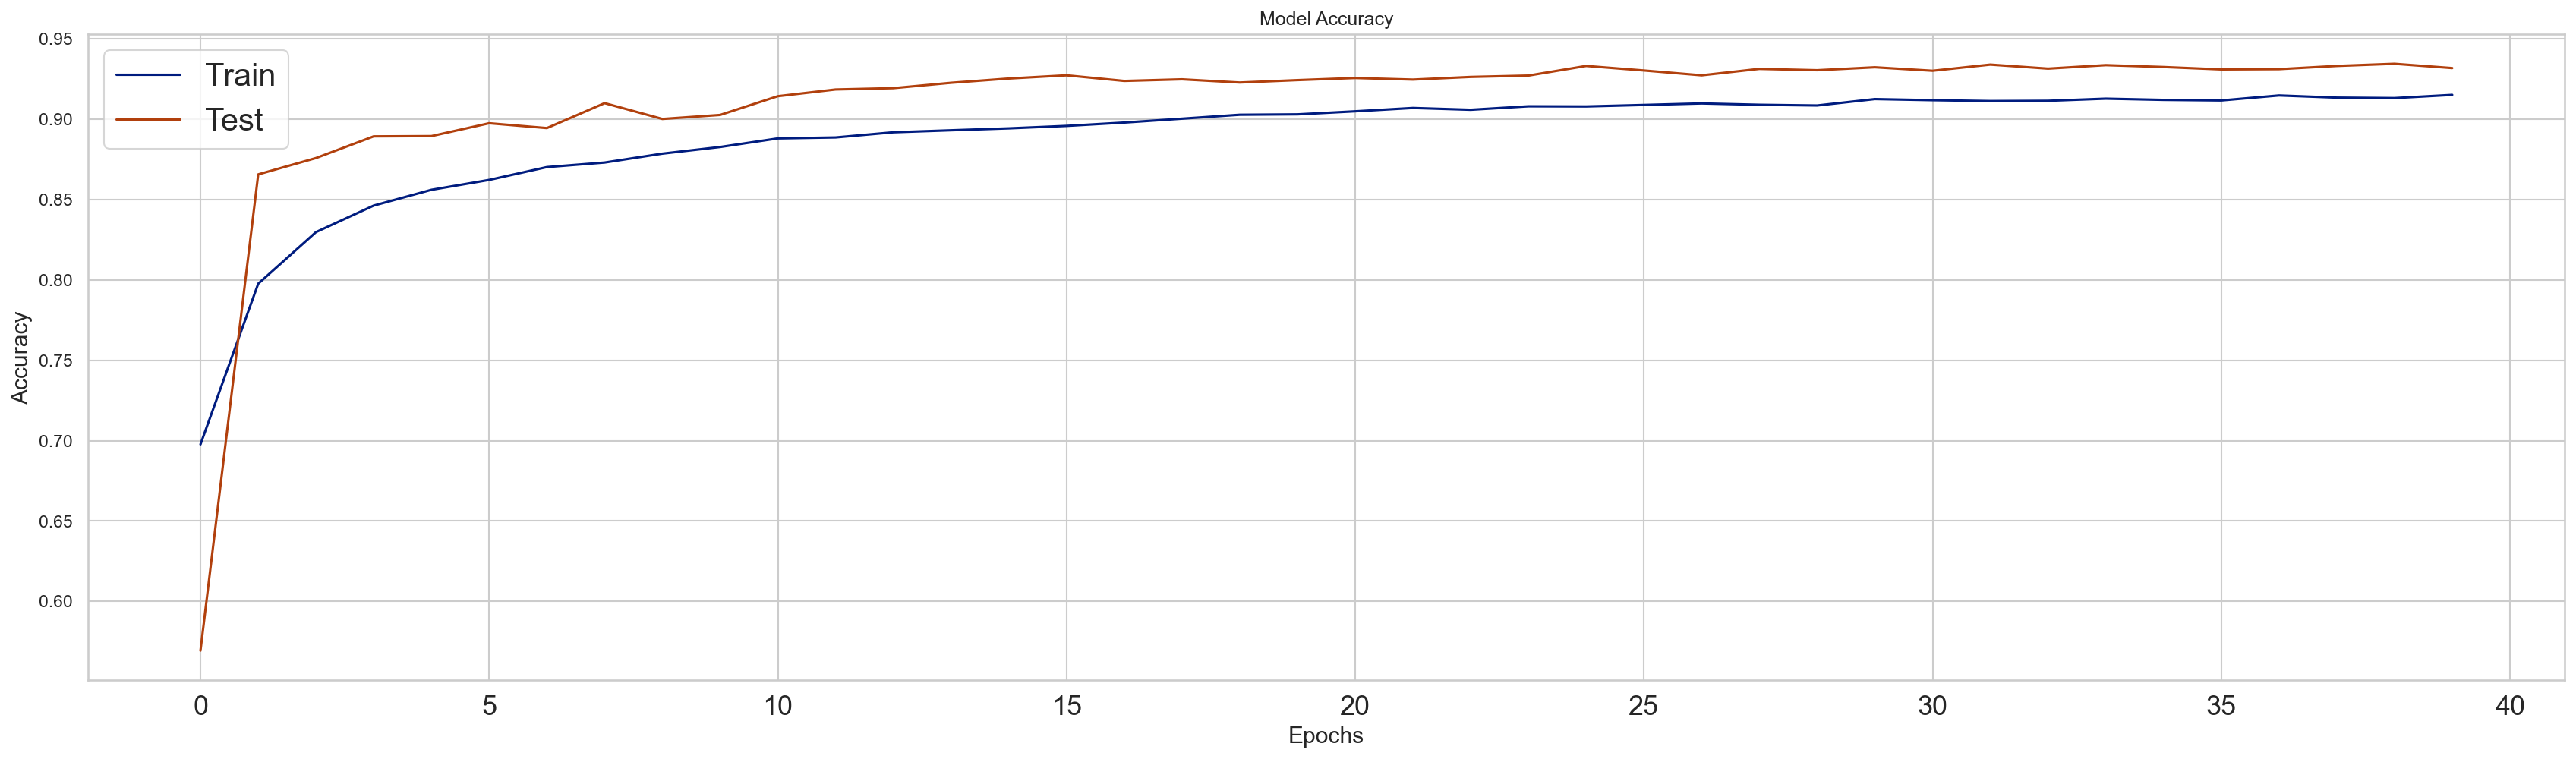

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

#### The Training and Validation Curves being close, we can conclude that the Model is not Overfitting the Data

## 6) Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

Let's view the the Performance of our classification model on the data using Confusion Matrix.

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

188/188 [==============================] - 16s 72ms/step


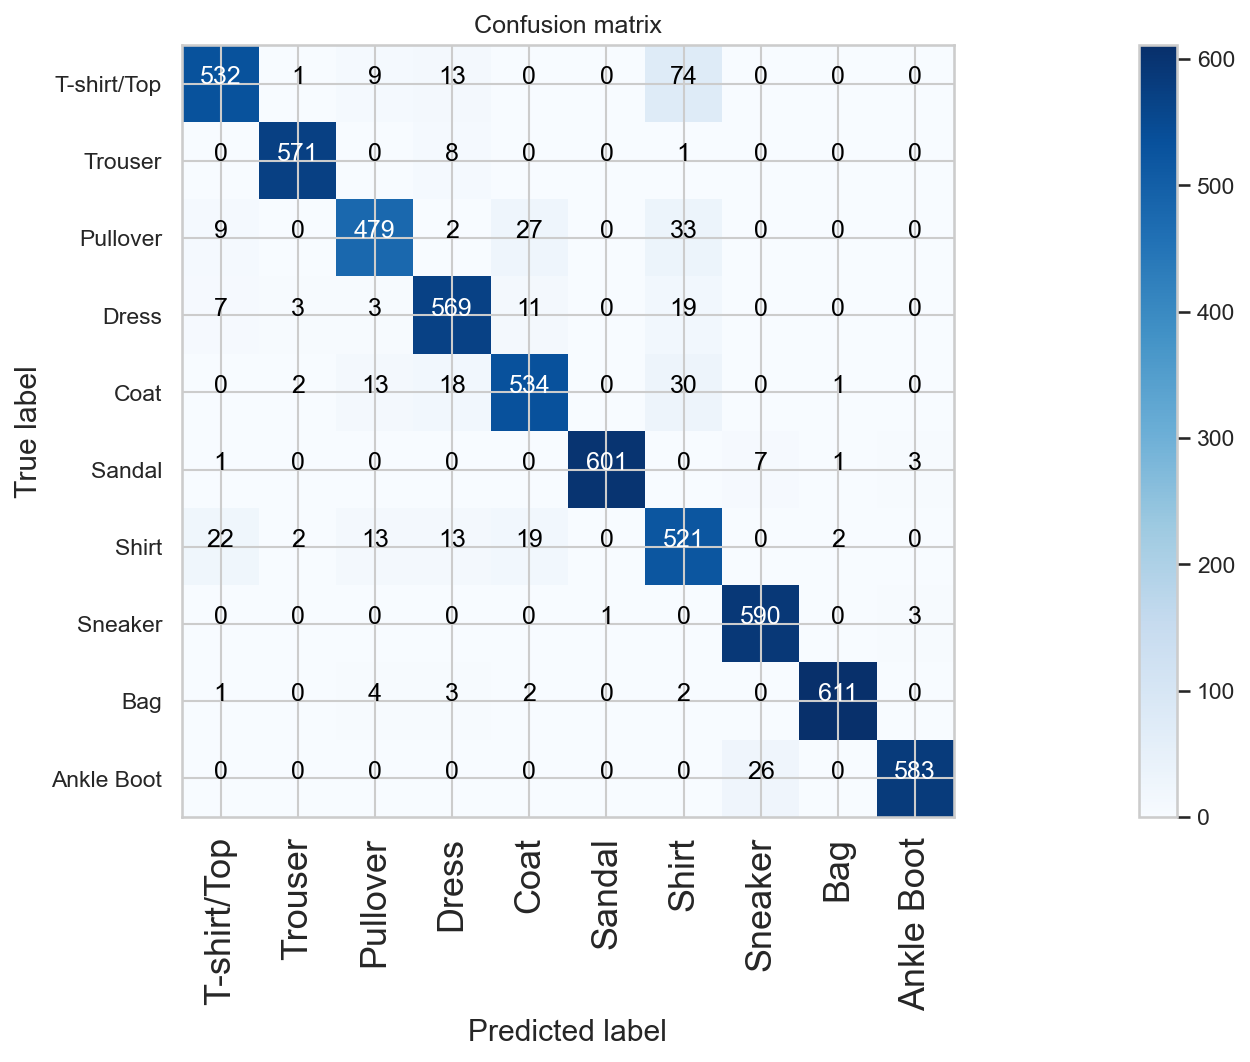

In [34]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

## 7) Visualization of Predicted Classes

### 7.1) Correctly Predicted Classes

In [35]:
correct = []
for i in range(len(y_test)):
    if(Y_pred_classes[i] == Y_true[i]):
        correct.append(i)
    if(len(correct) == 4):
        break

Text(0.5, 1.0, 'Predicted Label : Sandal\nActual Label : Sandal')

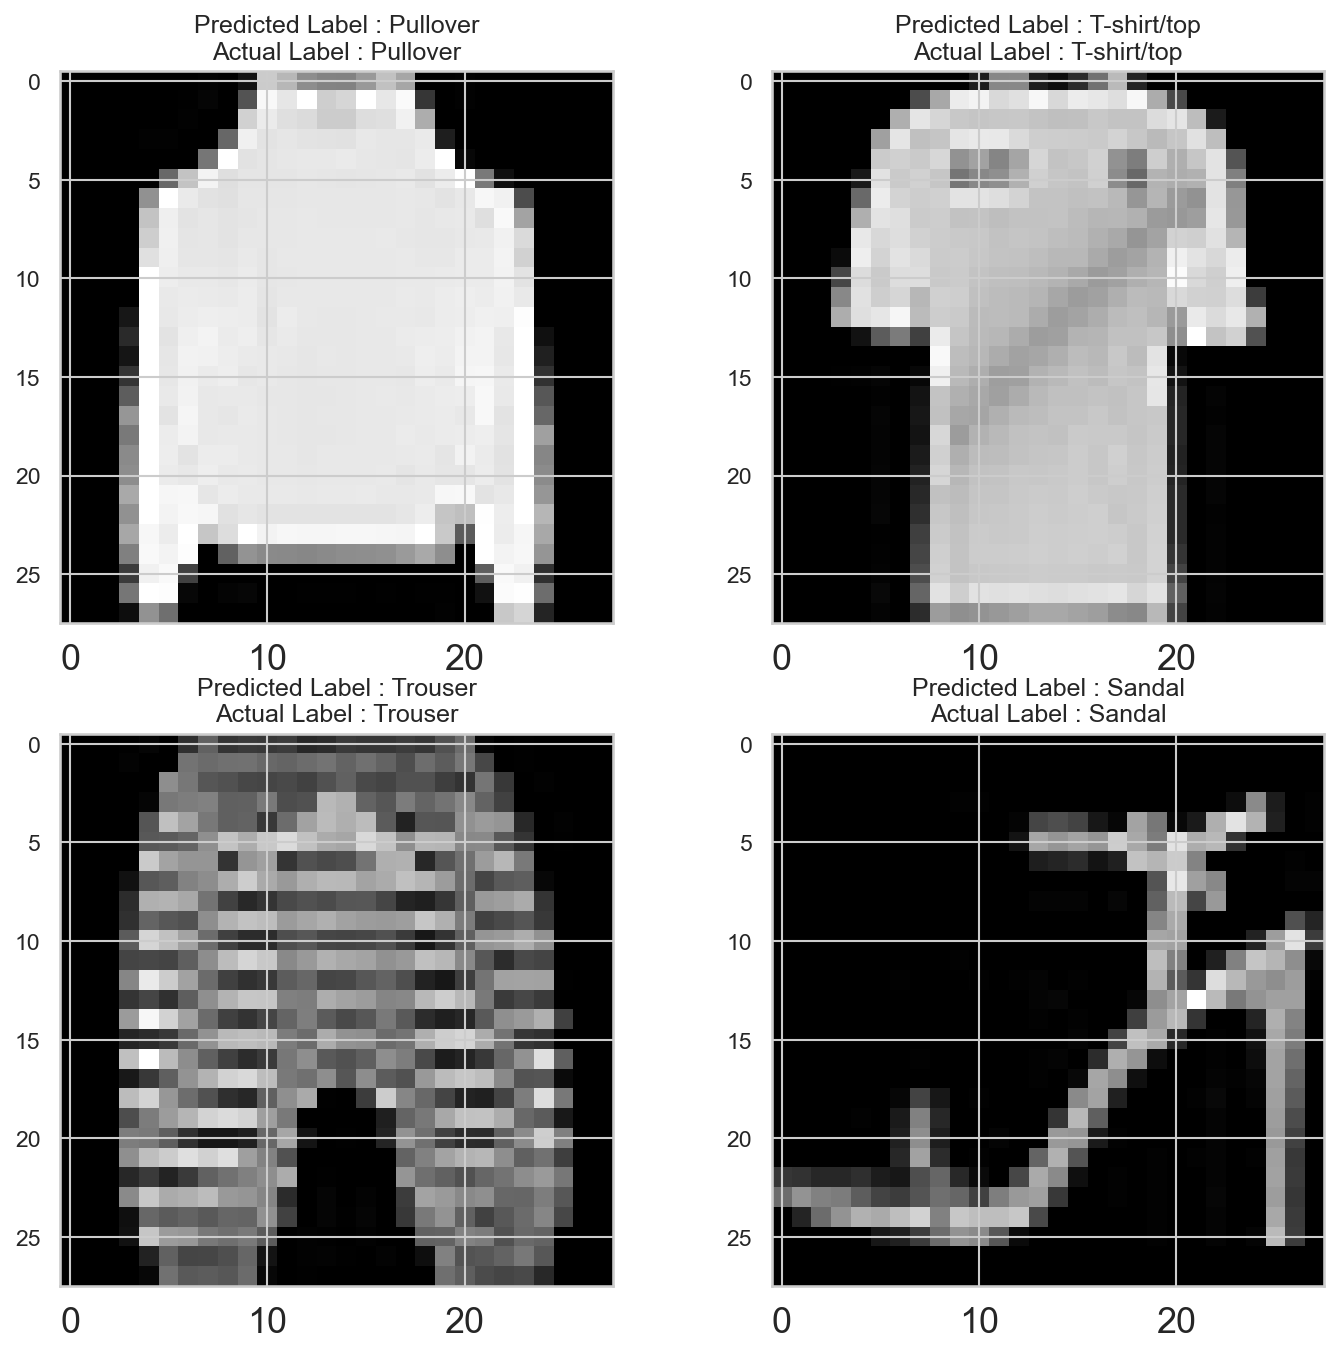

In [36]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(x_test[correct[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[0]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[correct[0]]]))
ax[0,1].imshow(x_test[correct[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[1]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[correct[1]]]))
ax[1,0].imshow(x_test[correct[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[2]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[correct[2]]]))
ax[1,1].imshow(x_test[correct[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[3]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[correct[3]]]))

### 7.2) Incorrectly Predicted Classes

In [37]:
incorrect = []
for i in range(len(y_test)):
    if(not Y_pred_classes[i] == Y_true[i]):
        incorrect.append(i)
    if(len(incorrect) == 4):
        break

Text(0.5, 1.0, 'Predicted Label : Shirt\nActual Label : T-shirt/top')

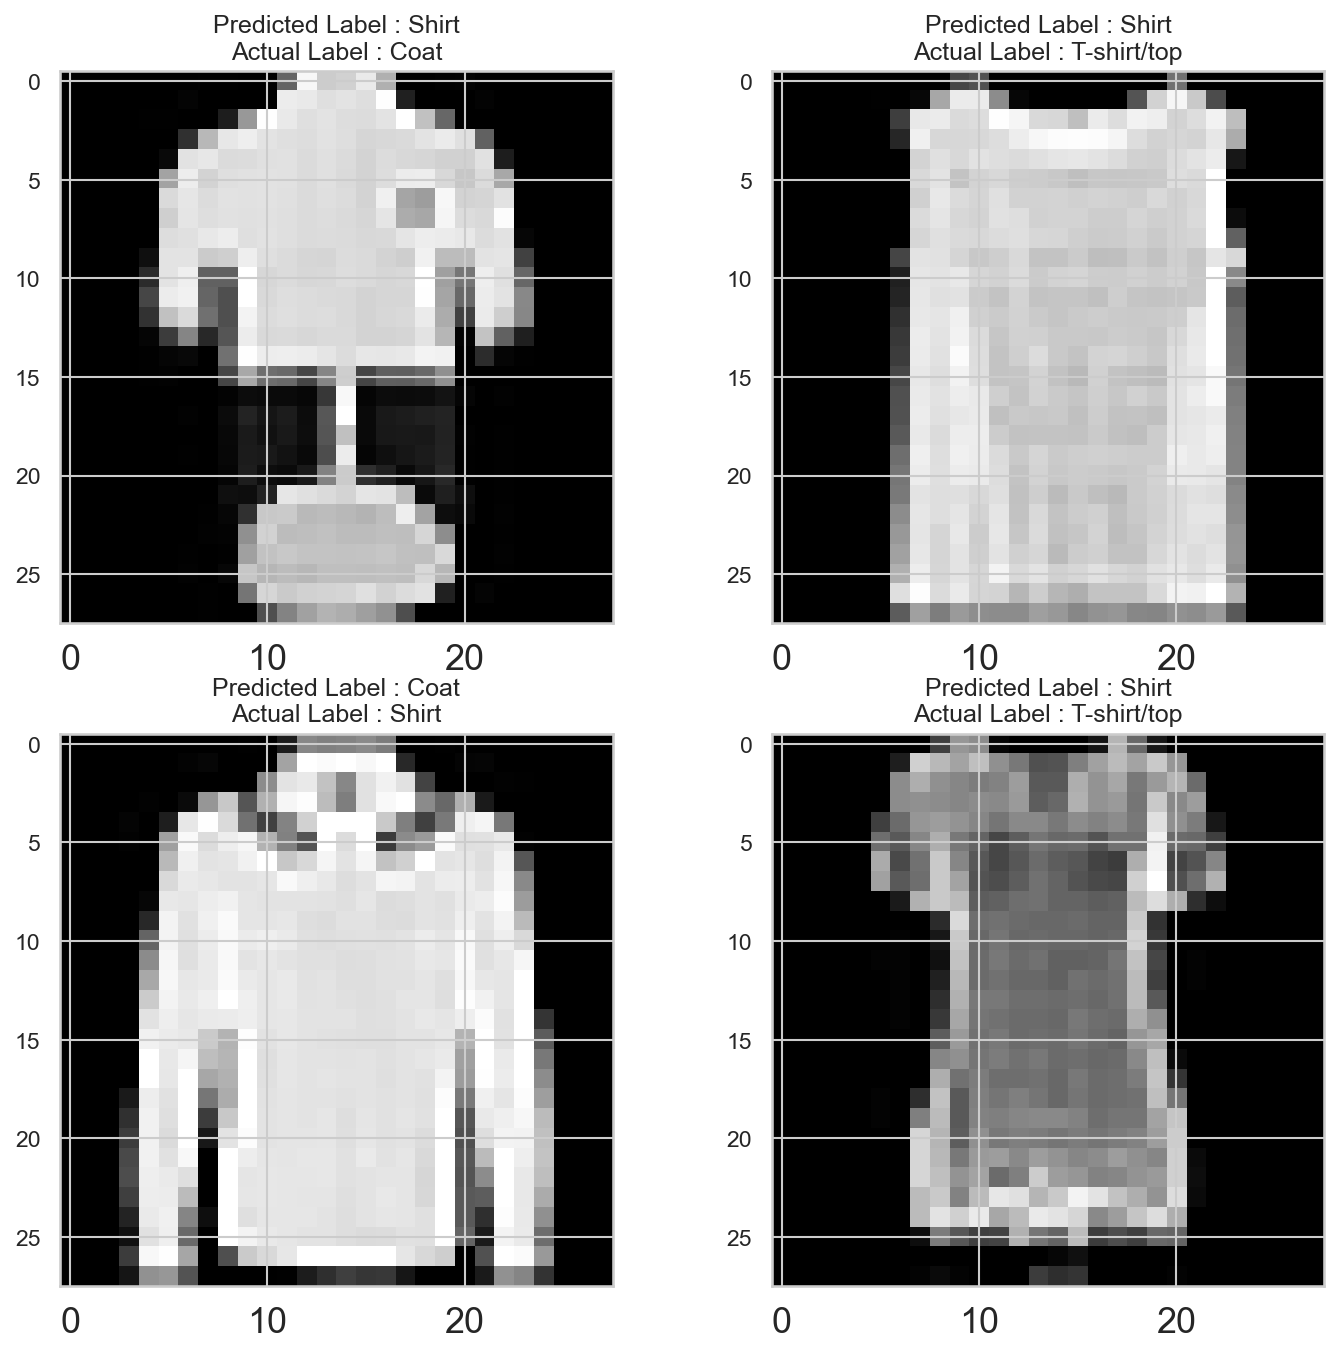

In [38]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(x_test[incorrect[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[0]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[incorrect[0]]]))
ax[0,1].imshow(x_test[incorrect[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[1]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[incorrect[1]]]))
ax[1,0].imshow(x_test[incorrect[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[2]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[incorrect[2]]]))
ax[1,1].imshow(x_test[incorrect[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[3]]]) + "\n"+"Actual Label : " + 
                 str(clothing[Y_true[incorrect[3]]]))

### 8) Classification Report

The classification report visualizer displays the precision, recall, F1, and support scores for the model.

#### Precision:

Precision is the ability of a classiifer not to label an instance positive that is actually negative. Basically, it is defined as as the ratio of true positives to the sum of true and false positives. “For all instances classified positive, what percent was correct?”

#### Recall:

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. “For all instances that were actually positive, what percent was classified correctly?”

#### F1 Score:

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0 . Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation.

#### Support:

Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.

#### Looking at the Precision of the Shirts, we can see that our model predicted less than 80% of Shirts correctly out of the total images it predicted as Shirts. We did conclude the same from the confusion matrix, where we saw that a lot of T-shirts were misclassified as Shirts

## 9) Predicting on the Test Data

 Evaluating the Models performance on the Test Data.

In [39]:
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

              precision    recall  f1-score   support

 T-shirt/Top       0.93      0.85      0.89       629
     Trouser       0.99      0.98      0.99       580
    Pullover       0.92      0.87      0.89       550
       Dress       0.91      0.93      0.92       612
        Coat       0.90      0.89      0.90       598
      Sandal       1.00      0.98      0.99       613
       Shirt       0.77      0.88      0.82       592
     Sneaker       0.95      0.99      0.97       594
         Bag       0.99      0.98      0.99       623
  Ankle Boot       0.99      0.96      0.97       609

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000



In [40]:
X = df_test
Y = to_categorical(test.iloc[:,0])

In [41]:
score = model.evaluate(X, Y)

print("Loss: {:.4f}".format(score[0]))
print("Accuracy: {:.4f}".format(score[1]))

313/313 [==============================] - 23s 74ms/step - loss: 0.1801 - accuracy: 0.9329
Loss: 0.1801
Accuracy: 0.9329
